# Chapter04 推測統計の基本（確率）

- 4.1 母集団と標本
- 4.2 確率モデル
- 4.3 推測統計における確率
- 4.4 これから学ぶこと

In [2]:
# ライブラリーの準備
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML

%precision 3
%matplotlib inline

In [3]:
# データの準備
df = pd.read_csv('../data/ch4_scores400.csv')
df.head()

,点数
0,76
1,55
2,80
3,80
4,74


In [4]:
scores = np.array(df['点数'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

## 4.1 母集団と標本

- 母集団（population）
  - 推測したい観測対象全体のこと
- 標本（sample）
  - 推測に使う観測対象の一部のこと
- 標本抽出（sampling）
  - 母集団から標本を取り出すこと
  - 無作為抽出（random sampling）
  - 復元抽出（sampling with replacement）
    - 複数回同じ標本を選ぶ抽出方法
  - 非復元抽出（sampling without replacement）
    - 同じ標本は一度しか選ばない抽出方法
- 標本の大きさ（sample size）
  - 母集団から取り出す標本の数
- 標本統計量
  - 標本から計算される平均や分散、相関係数などの総称
- 母数（parameter）
  - 母集団の平均（母平均）や分散（母分散）などの総称
- 推定量（estimator）
  - 標本平均は、母平均の推定量
- 推定値（estimate）
  - 実際に標本のデータを用いて計算した結果

In [5]:
# 無作為抽出
# np.random.choice()関数
# リスト[1, 2, 3]からサンプルサイズ3で無作為抽出
np.random.choice([1, 2, 3], 3)

array([1, 2, 3])

In [6]:
# 非復元抽出
np.random.choice([1, 2, 3], 3, replace=False)

array([3, 2, 1])

In [7]:
# 乱数のシード
# 発生させる乱数の元になる数字を定めておく
np.random.seed(0)
np.random.choice([1, 2, 3], 3)

array([1, 2, 1])

In [8]:
# サンプルサイズ:20、復元抽出で、標本平均を求める
np.random.seed(0)
sample = np.random.choice(scores, 20)
sample.mean()

70.400

In [9]:
# socoresの母平均
scores.mean()

69.530

In [10]:
# サンプルサイズ:20で無作為抽出を行い、標本平均を求める
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f"{i+1}回目の無作為抽出で得られた標本平均: ", sample.mean())

1回目の無作為抽出で得られた標本平均:  72.45
2回目の無作為抽出で得られた標本平均:  63.7
3回目の無作為抽出で得られた標本平均:  66.05
4回目の無作為抽出で得られた標本平均:  71.7
5回目の無作為抽出で得られた標本平均:  74.15


## 4.2 確率モデル

- 確率（probability）
- 確率モデル（probability model）
  - 確率を使って、無作為抽出やサイコロを数学的にモデル化したもの

### 4.2.1 確率の基本

- 確率変数（random variable）
  - とりうる値とその値が出る確率が決まっているもの
- 試行（trail）
  - 確率変数の結果を観測すること
- 実現値（realization）
  - 試行によって観測された値のこと
- 事象（event）
  - 試行の結果、起こりうる出来事
- 根元事象（elementary event）
  - これ以上細かくできない事象のこと
  - 「サイコロの出目が1」など

- サイコロの出目が1になる事象の確率が1/6
  - $ P(X=1) = \dfrac{1}{6} $

- サイコロの出目が奇数

\begin{align}
  P((X=1))\cap(X=3)\cap(X=5) &= P(X=1)+P(X=3)+P(X=5)\\
                             &= \dfrac{1}{6} + \dfrac{1}{6} + \dfrac{1}{6}\\
                             &= \dfrac{1}{2}
\end{align}
 
 - 「事象がお互いに排反なら、それらのうち少なくとも1つが起こる事象は、各事象の確率の和に等しい」
 - 「お互いに排反」とは、
   - それぞれの事象が同時に起こり得ないということ
   - 「出目が1か2か3か」という事象と、「出目が6」という事象は同時には起こり得ない
 - 「お互いに排反でない」例
   - 「出目が1か2か3か」という事象と、「出目が偶数」という事象は、「出目が2」のときにどちらの事象も同時に起きている

### 4.2.2 確率分布

- 確率分布（probability distribution）
  - 確率変数がどのような振る舞いをするかを表したもの

サイコロの確率分布

|出目|1|2|3|4|5|6|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|確率|1/6|1/6|1/6|1/6|1/6|1/6|

いかさまサイコロの確率分布

|出目|1|2|3|4|5|6|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|確率|1/21|2/21|3/21|4/21|5/21|6/21|

In [11]:
# いかさまサイコロの確率分布を確認する
dice = [1, 2 ,3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]
np.random.choice(dice, p=prob)

1

In [12]:
# いかさまサイコロを100回試行する
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([4, 6, 4, 5, 5, 6, 6, 3, 5, 6, 5, 6, 6, 2, 3, 1, 6, 5, 6, 3, 4, 5,
       3, 4, 3, 5, 5, 4, 4, 6, 4, 6, 5, 6, 5, 4, 6, 2, 6, 4, 5, 3, 4, 6,
       5, 5, 5, 3, 4, 5, 4, 4, 6, 4, 4, 6, 6, 2, 2, 4, 5, 1, 6, 4, 3, 2,
       2, 6, 3, 5, 4, 2, 4, 4, 6, 6, 1, 5, 3, 6, 6, 4, 2, 1, 6, 4, 4, 2,
       4, 1, 3, 6, 6, 6, 4, 5, 4, 3, 3, 4])

In [13]:
# 度数分布表を作成する
freq, _ = np.histogram(sample, bins=6, range=(1, 6+1))
pd.DataFrame(
    {'freq': freq, 'rel_freq': freq / num_trial},
    index=pd.Index(np.arange(1, 7), name='rolls')
)

,freq,rel_freq
rolls,,
1,5,0.05
2,9,0.09
3,13,0.13
4,27,0.27
5,19,0.19
6,27,0.27


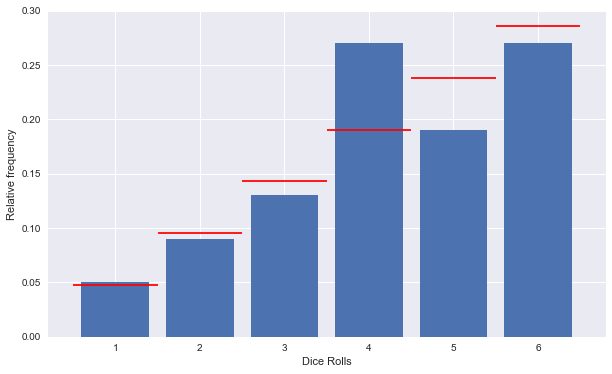

In [14]:
# ヒストグラムの描画
plt.style.use('seaborn')
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)

# 真の確率分布を横線で表示する
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='red')

# 各ビンの[1.5, 2.5, ..., 6.5]の場所に目盛りを付ける
ax.set_xticks(np.linspace(1.5, 6.5, 6))

# 目盛りの値[1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('Dice Rolls')
ax.set_ylabel('Relative frequency')

plt.show()

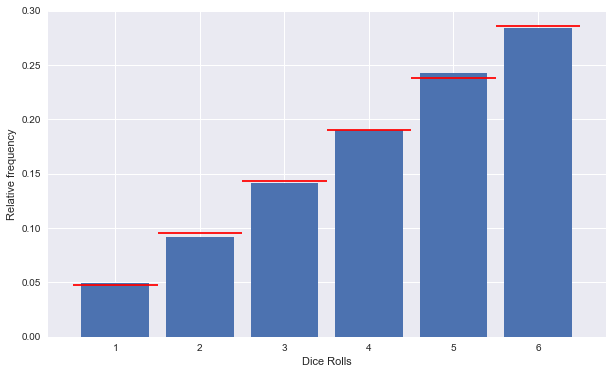

In [15]:
# 試行回数10,000回
num_trial = 10_000
sample = np.random.choice(dice, num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)

ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='red')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('Dice Rolls')
ax.set_ylabel('Relative frequency')

plt.show()


In [16]:
# 図4.3 試行回数を変化させたときの出目のヒストグラム
num_frame = 50
space = np.logspace(2, 5, num_frame).astype(int)
sample = np.random.choice(dice, size=100000, p=prob)


def animate(nframe):
    num_trial = space[nframe]
    ax.clear()
    ax.hist(sample[:num_trial], bins=6, range=(1, 7), density=True, rwidth=0.8)
    ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='red')
    ax.set_title(f'Number of trial:{num_trial}')
    ax.set_xticks(np.linspace(1.5, 6.5, 6))
    ax.set_xticklabels(np.arange(1, 7))
    ax.set_ylim(0, 0.3)
    ax.set_xlabel('Dice Roll', fontsize=12)
    ax.set_ylabel('Relative frequency', fontsize=12)


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
anim = ani.FuncAnimation(fig, animate, frames=num_frame)
js_anim = HTML(anim.to_jshtml())
plt.close()

js_anim


## 4.3 推測統計における確率

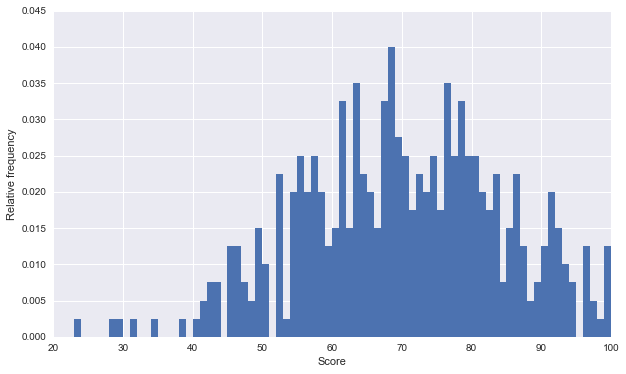

In [17]:
# 全生徒の点数をヒストグラムに図示する
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.045)
ax.set_xlabel('Score')
ax.set_ylabel('Relative frequency')

plt.show()

In [18]:
# １回試行する
np.random.choice(scores)

61

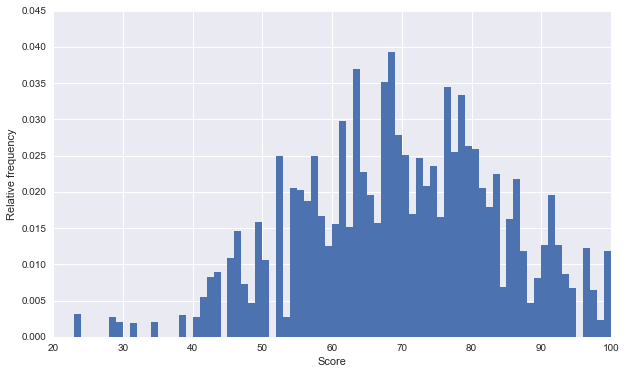

In [19]:
# 無作為抽出を10,000回試行する
sample = np.random.choice(scores, 10_000)

# ヒストグラムに図示する
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.045)
ax.set_xlabel('Score')
ax.set_ylabel('Relative frequency')
plt.show()


In [20]:
# 図4.5 無作為抽出で得た標本データのヒストグラム
np.random.seed(0)
sample = np.random.choice(scores, 10000)
num_frame = 50
space = np.logspace(1, 4, num_frame).astype(int)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)


def animate(nframe):
    num_sample = space[nframe]
    ax.clear()
    ax.hist(sample[:num_sample], bins=100, range=(0, 100), density=True)
    ax.set_xlabel('Score', fontsize=12)
    ax.set_ylabel('Relative frequency', fontsize=12)
    ax.set_title(f'Sample size：{num_sample}')
    ax.set_xlim(20, 100)


anim = ani.FuncAnimation(fig, animate, frames=num_frame)
js_anim = HTML(anim.to_jshtml())
plt.close()

js_anim


/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_2762/2195670850.py:22: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  js_anim = HTML(anim.to_jshtml())


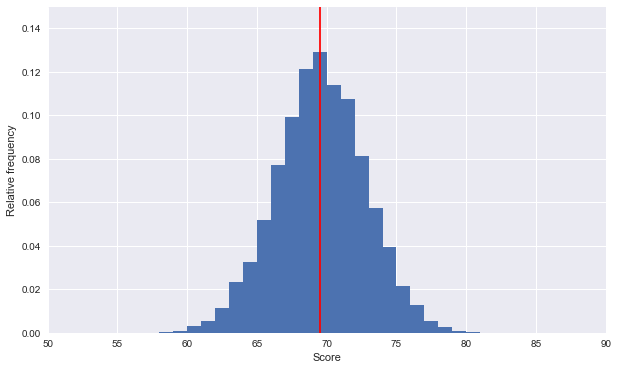

In [21]:
# 無作為抽出でサンプルサイズ:20の標本を抽出して、標本平均を計算する
# 10,000回行う
# その結果をヒストグラムに図示する（標本平均の分布）

sample_mean = [
    np.random.choice(scores,20).mean()
    for _ in range(10_000)
]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_mean, bins=100, range=(0, 100), density=True)
# 母平均を縦線で表示
ax.vlines(np.mean(scores), 0, 1, colors='red')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.15)
ax.set_xlabel('Score')
ax.set_ylabel('Relative frequency')
plt.show()


## 4.4 これから学ぶこと

- 推定とは、
  - 母数を推測すること
- 点推定
  - １つの値で推定すること
- 区間推定
  - 区間で推定すること
- 検定とは、
  - 母集団の統計的性質について仮設を立て、その仮設が正しいかどうかを判断する手法
- 回帰分析
  - 複数のデータ間の関係性について分析する手法